In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('C:\\Post Graduate Course in Data Analytics\\MACHINE LEARNING\\RANDOM FORESTS\\TaxiFarePrediction\\Dataset\\TaxiFare.csv')
df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Year_of_Pickup,Month_of_Pickup,Date_of_Pickup,Hour_of_Pickup,Minute_of_Pickup,Second_of_Pickup,Distance_Travelled
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,26,21,0.640487
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,52,16,5.250670
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,35,0,0.863411
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,30,42,1.739386
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,51,0,1.242218


In [4]:
df.isnull().sum()

amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
Year_of_Pickup          0
Month_of_Pickup         0
Date_of_Pickup          0
Hour_of_Pickup          0
Minute_of_Pickup        0
Second_of_Pickup        0
Distance_Travelled      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount                50000 non-null  float64
 1   date_time_of_pickup   50000 non-null  object 
 2   longitude_of_pickup   50000 non-null  float64
 3   latitude_of_pickup    50000 non-null  float64
 4   longitude_of_dropoff  50000 non-null  float64
 5   latitude_of_dropoff   50000 non-null  float64
 6   no_of_passenger       50000 non-null  int64  
 7   Year_of_Pickup        50000 non-null  int64  
 8   Month_of_Pickup       50000 non-null  int64  
 9   Date_of_Pickup        50000 non-null  int64  
 10  Hour_of_Pickup        50000 non-null  int64  
 11  Minute_of_Pickup      50000 non-null  int64  
 12  Second_of_Pickup      50000 non-null  int64  
 13  Distance_Travelled    50000 non-null  float64
dtypes: float64(6), int64(7), object(1)
memory usage: 5.3+ MB


In [6]:
df.shape

(50000, 14)

In [7]:
df.amount.value_counts()

6.50     2468
4.50     2104
8.50     1929
6.10     1441
5.30     1440
         ... 
55.30       1
34.44       1
52.40       1
25.40       1
28.54       1
Name: amount, Length: 703, dtype: int64

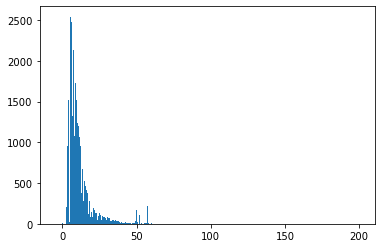

In [10]:
plt.hist(df.amount,bins='auto')
plt.show()

In [11]:
from scipy import stats

In [12]:
iqr_amt=stats.iqr(df.amount)
uplim1=df.amount.quantile(0.75)+(1.5*iqr_amt)
lowlim1=df.amount.quantile(0.25)-(1.5*iqr_amt)
print(len(df[df.amount>uplim1]))
print(len(df[df.amount<lowlim1]))

4364
1


In [13]:
print(len(df.amount[df.amount<0]))
print(len(df.amount[df.amount>150]))
print(len(df.amount[df.amount>100]))
print(len(df.amount[df.amount>50]))

6
5
16
636


In [14]:
for i in range(22,32,1):
    df_len=len(df.amount[df.amount>1])
    print('Taxi Fare paid more than: ', i ,'No of passengers: ',df_len)

Taxi Fare paid more than:  22 No of passengers:  49990
Taxi Fare paid more than:  23 No of passengers:  49990
Taxi Fare paid more than:  24 No of passengers:  49990
Taxi Fare paid more than:  25 No of passengers:  49990
Taxi Fare paid more than:  26 No of passengers:  49990
Taxi Fare paid more than:  27 No of passengers:  49990
Taxi Fare paid more than:  28 No of passengers:  49990
Taxi Fare paid more than:  29 No of passengers:  49990
Taxi Fare paid more than:  30 No of passengers:  49990
Taxi Fare paid more than:  31 No of passengers:  49990


In [15]:
df.date_time_of_pickup.describe()

count                   50000
unique                  49555
top       2011-09-03 01:30:00
freq                        3
Name: date_time_of_pickup, dtype: object

In [17]:
df.date_time_of_pickup=pd.to_datetime(df.date_time_of_pickup)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   amount                50000 non-null  float64       
 1   date_time_of_pickup   50000 non-null  datetime64[ns]
 2   longitude_of_pickup   50000 non-null  float64       
 3   latitude_of_pickup    50000 non-null  float64       
 4   longitude_of_dropoff  50000 non-null  float64       
 5   latitude_of_dropoff   50000 non-null  float64       
 6   no_of_passenger       50000 non-null  int64         
 7   Year_of_Pickup        50000 non-null  int64         
 8   Month_of_Pickup       50000 non-null  int64         
 9   Date_of_Pickup        50000 non-null  int64         
 10  Hour_of_Pickup        50000 non-null  int64         
 11  Minute_of_Pickup      50000 non-null  int64         
 12  Second_of_Pickup      50000 non-null  int64         
 13  Distance_Travell

In [18]:
df['year']=df['date_time_of_pickup'].dt.year
df['month']=df['date_time_of_pickup'].dt.month_name()
df['day']=df['date_time_of_pickup'].dt.day_name()
df['hour']=df['date_time_of_pickup'].dt.hour

df.drop('date_time_of_pickup',axis=1,inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount                50000 non-null  float64
 1   longitude_of_pickup   50000 non-null  float64
 2   latitude_of_pickup    50000 non-null  float64
 3   longitude_of_dropoff  50000 non-null  float64
 4   latitude_of_dropoff   50000 non-null  float64
 5   no_of_passenger       50000 non-null  int64  
 6   Year_of_Pickup        50000 non-null  int64  
 7   Month_of_Pickup       50000 non-null  int64  
 8   Date_of_Pickup        50000 non-null  int64  
 9   Hour_of_Pickup        50000 non-null  int64  
 10  Minute_of_Pickup      50000 non-null  int64  
 11  Second_of_Pickup      50000 non-null  int64  
 12  Distance_Travelled    50000 non-null  float64
 13  year                  50000 non-null  int64  
 14  month                 50000 non-null  object 
 15  day                

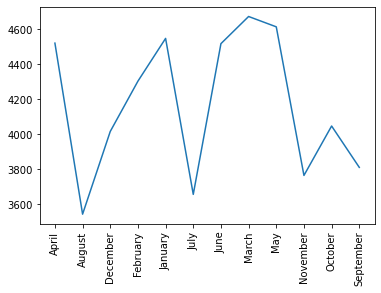

In [20]:
plt.plot(df.groupby('month')['amount'].count())
plt.xticks(rotation=90)
plt.show()

In [22]:
def distance(lat1, lon1, lat2, lon2):
  p = 0.017453292519943295 # Pi/180
  a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p))/2
  return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

df['distance_travelled'] = distance(df.latitude_of_pickup, df.longitude_of_pickup,
                                    df.latitude_of_dropoff, df.longitude_of_dropoff)
df.distance_travelled.head()

0    0.640487
1    5.250670
2    0.863411
3    1.739386
4    1.242218
Name: distance_travelled, dtype: float64

C:\Users\soume\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='distance_travelled', ylabel='amount'>

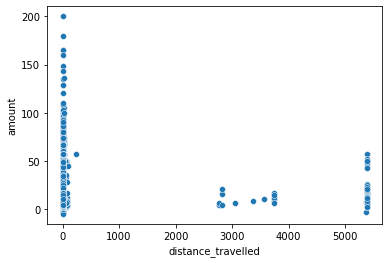

In [23]:
sns.scatterplot(df.distance_travelled,df.amount)

In [25]:
df.drop(['year','month','day','hour'],axis=1,inplace=True)

In [28]:
df.drop('distance_travelled',axis=1,inplace=True)

In [29]:
df

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Year_of_Pickup,Month_of_Pickup,Date_of_Pickup,Hour_of_Pickup,Minute_of_Pickup,Second_of_Pickup,Distance_Travelled
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,26,21,0.640487
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,52,16,5.250670
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,35,0,0.863411
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,30,42,1.739386
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,51,0,1.242218
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,15.0,-73.999973,40.748531,-74.016899,40.705993,1,2013,6,12,23,25,15,3.069806
49996,7.5,-73.984756,40.768211,-73.987366,40.760597,1,2015,6,22,17,19,18,0.543517
49997,6.9,-74.002698,40.739428,-73.998108,40.759483,1,2011,1,30,4,53,0,1.406341
49998,4.5,-73.946062,40.777567,-73.953450,40.779687,2,2012,11,6,7,9,0,0.413364


In [30]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount                50000 non-null  float64
 1   longitude_of_pickup   50000 non-null  float64
 2   latitude_of_pickup    50000 non-null  float64
 3   longitude_of_dropoff  50000 non-null  float64
 4   latitude_of_dropoff   50000 non-null  float64
 5   no_of_passenger       50000 non-null  int64  
 6   Year_of_Pickup        50000 non-null  int64  
 7   Month_of_Pickup       50000 non-null  int64  
 8   Date_of_Pickup        50000 non-null  int64  
 9   Hour_of_Pickup        50000 non-null  int64  
 10  Minute_of_Pickup      50000 non-null  int64  
 11  Second_of_Pickup      50000 non-null  int64  
 12  Distance_Travelled    50000 non-null  float64
dtypes: float64(6), int64(7)
memory usage: 5.0 MB


In [32]:
x=df.iloc[:,5:13]
print(x.shape)
y=df.iloc[:,0]
print(y.shape)

(50000, 8)
(50000,)


In [33]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=123)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(37500, 8)
(12500, 8)
(37500,)
(12500,)


In [34]:
linreg=sm.OLS(ytrain,xtrain).fit()
print(linreg.summary())

                                 OLS Regression Results                                
Dep. Variable:                 amount   R-squared (uncentered):                   0.575
Model:                            OLS   Adj. R-squared (uncentered):              0.575
Method:                 Least Squares   F-statistic:                              6351.
Date:                Fri, 13 Aug 2021   Prob (F-statistic):                        0.00
Time:                        23:40:43   Log-Likelihood:                     -1.3879e+05
No. Observations:               37500   AIC:                                  2.776e+05
Df Residuals:                   37492   BIC:                                  2.777e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [35]:
ypred=linreg.predict(xtest)
ypred

11872    11.448008
40828    11.703164
36400    11.119841
5166     11.299830
30273    11.611148
           ...    
49059    11.514055
35361    11.563770
10810    12.035594
20916    10.504266
34989    11.513382
Length: 12500, dtype: float64

In [36]:
mse=mean_squared_error(ytest,ypred)
rmse=np.sqrt(mse)
rmse

9.297493857101417

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
sc=StandardScaler()
xtrain_sc=sc.fit_transform(xtrain)
xtest_sc=sc.fit_transform(xtest)

In [41]:
linreg1=sm.OLS(ytrain,xtrain_sc).fit()
print(linreg1.summary())

                                 OLS Regression Results                                
Dep. Variable:                 amount   R-squared (uncentered):                   0.007
Model:                            OLS   Adj. R-squared (uncentered):              0.007
Method:                 Least Squares   F-statistic:                              32.86
Date:                Fri, 13 Aug 2021   Prob (F-statistic):                    4.94e-52
Time:                        23:46:18   Log-Likelihood:                     -1.5472e+05
No. Observations:               37500   AIC:                                  3.095e+05
Df Residuals:                   37492   BIC:                                  3.095e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [42]:
ypred1=linreg1.predict(xtest_sc)
ypred1

array([-0.08659468, -1.10428582,  0.83463988, ...,  2.0491283 ,
        0.48462704,  0.39846243])

In [43]:
mse1=mean_squared_error(ytest,ypred1)
rmse1=np.sqrt(mse1)
rmse1

14.557039216289837